# 项目：用逻辑回归预测泰坦尼克号幸存情况

## 分析目标

此数据分析报告的目的是，基于泰坦尼克号乘客的性别和船舱等级等属性，对幸存情况进行逻辑回归分析，从而能利用得到的模型，对未知幸存情况的乘客，根据属性预测是否从沉船事件中幸存。

## 简介

> 泰坦尼克号（英语：RMS Titanic）是一艘奥林匹克级邮轮，于1912年4月首航时撞上冰山后沉没。泰坦尼克号是同级的3艘超级邮轮中的第2艘，与姐妹船奥林匹克号和不列颠号为白星航运公司的乘客们提供大西洋旅行。

> 泰坦尼克号由位于北爱尔兰贝尔法斯特的哈兰·沃尔夫船厂兴建，是当时最大的客运轮船，由于其规模相当一艘现代航空母舰，因而号称“上帝也沉没不了的巨型邮轮”。在泰坦尼克号的首航中，从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，计划横渡大西洋前往美国纽约市。但因为人为错误，于1912年4月14日船上时间夜里11点40分撞上冰山；2小时40分钟后，即4月15日凌晨02点20分，船裂成两半后沉入大西洋，死亡人数超越1500人，堪称20世纪最大的海难事件，同时也是最广为人知的海难之一。

数据集包括两个数据表：`titianic_train.csv`和`titanic_test.csv`。

`titianic_train.csv`记录了超过八百位泰坦尼克号乘客在沉船事件后的幸存情况，以及乘客的相关信息，包括所在船舱等级、性别、年龄、同乘伴侣/同胞数量、同乘父母/孩子数量，等等。

`titanic_test.csv`只包含乘客（这些乘客不在`titianic_train.csv`里）相关信息，此文件可以被用于预测乘客是否幸存。

`titianic_train.csv`每列的含义如下：
- PassengerId：乘客ID
- survival：是否幸存
   - 0	否
   - 1	是
- pclass：船舱等级
   - 1	一等舱
   - 2	二等舱
   - 3  三等舱
- sex：性别
- Age：年龄
- sibsp：同乘伴侣/同胞数量
- parch：同乘父母/孩子数量
- ticket：船票号
- fare：票价金额
- cabin：船舱号
- embarked：登船港口
   - C  瑟堡
   - Q  皇后镇
   - S  南安普敦
   
   
`titianic_test.csv`每列的含义和上面相同，但不具备survival变量的数据，即是否幸存。

## 分析过程

### 一.数据的读取与准备工作

In [1]:
import pandas as pd
import numpy as np

In [2]:
original_train=pd.read_csv("./titanic_train.csv")
original_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#复制一份数据用于处理
clean_train=original_train.copy()
clean_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 二.数据的评估与清理

#### 1.结构性问题

In [4]:
clean_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
440,441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45.0,1,1,F.C.C. 13529,26.2500,NaN,S
816,817,0,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,STON/O2. 3101290,7.9250,NaN,S
416,417,1,2,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",female,34.0,1,1,28220,32.5000,NaN,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q


随机取样观察发现，数据中不存在结构上的问题，因此不需要进行清理

#### 2.内容性问题

#### （1）缺失数据

In [5]:
#调用info方法
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


观察可以发现，Age、Cabin这两项数据存在缺失，PassengerId的数据类型应为字符串类型而非整型，Survived、Pclass、Sex、Embarked这四项数据应为分类数据类型

In [6]:
clean_train[clean_train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


发现一共有177条数据的年龄缺失，由于数据量过于庞大（约占20%），所以选择删除这些数据是不好的选择，因为这些数据的其他列会提供较多的信息，加之年龄对于预测幸存概率有一定的影响，因此最好的解决办法是填充这些缺失值，我们可以使用其余Age数据的平均值来填充缺失的部分

In [7]:
clean_train["Age"]=clean_train["Age"].fillna(clean_train["Age"].mean())

In [8]:
clean_train[clean_train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


然后处理Cabin缺失的问题，由于Cabin这个变量对于Survived并没有显著影响，后续进行逻辑回归分析前会进行删除，所以没有处理缺失值的必要。但在数据评估与清理环节，为了保持数据集的完整性，我们不必提前删除

转换PassengerId、Survived、Pclass、Sex、Embarked这五项数据的类型

In [9]:
clean_train["Survived"]=clean_train["Survived"].astype('category')
clean_train["Pclass"]=clean_train["Pclass"].astype('category')
clean_train["Sex"]=clean_train["Sex"].astype('category')
clean_train["Embarked"]=clean_train["Embarked"].astype('category')
clean_train["PassengerId"]=clean_train["PassengerId"].astype(str)

In [10]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(2), object(4)
memory usage: 59.8+ KB


#### （2）重复数据

在所有数据中，PassengerId、Ticket不能有重复，其余数据均可以允许重复

In [11]:
print(clean_train["PassengerId"].value_counts().sum())

891


In [12]:
print(clean_train["Ticket"].value_counts().sum())

891


发现PassengerId和Ticket均有891种不同的类型，与总的乘客数891相等，说明并不存在重复数据

#### （3）不一致数据

由于PassengerId和Ticket已经进行检查，其余数据中可能存在不一致情况的有Sex、Cabin、Embarked

In [13]:
clean_train["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [14]:
clean_train["Cabin"].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [15]:
clean_train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

观察发现并不存在不一致的情况

#### （4）无效数据

In [16]:
#调用describe方法
clean_train.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


发现并没有脱离实际的数据

#### （5）保存数据

In [17]:
#调用to_csv方法
clean_train.to_csv("./titanic_train_cleaned.csv",index=False)

### 三.数据整理

SibSp和Parch这两个变量均表示和自己有亲情关系的人的数量，因此可以将这两项数据进行合并

In [18]:
clean_train["FamilyNum"]=clean_train["SibSp"]+clean_train["Parch"]
clean_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### 四.数据可视化探索

在进行逻辑回归分析之前，我们可以先绘制图表来大致了解各个变量对于Survived的影响

In [19]:
#导入所需要的库
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#设置色盘
sns.set_palette("pastel")

先了解一下幸存乘客的大致占比

In [21]:
Survived_counts=clean_train["Survived"].value_counts()
Survived_counts

Survived
0    549
1    342
Name: count, dtype: int64

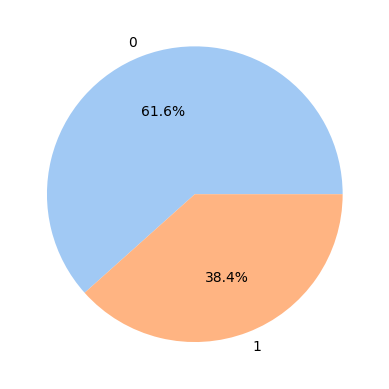

In [22]:
plt.pie(Survived_counts,labels=Survived_counts.index,autopct='%.1f%%')
plt.show()

可以看到，幸存乘客数大致占总人数的40%

#### 1.分类变量对survived的影响：Pclass、Sex、Embarked

#### （1）Pclass

对于Pclass,由于Pclass只有有限的三种，因此我们可以绘制饼图来了解各个等级舱的人数占比，再绘制计数图了解各个等级舱的幸存乘客的人数

In [23]:
Pclass_counts=clean_train["Pclass"].value_counts()

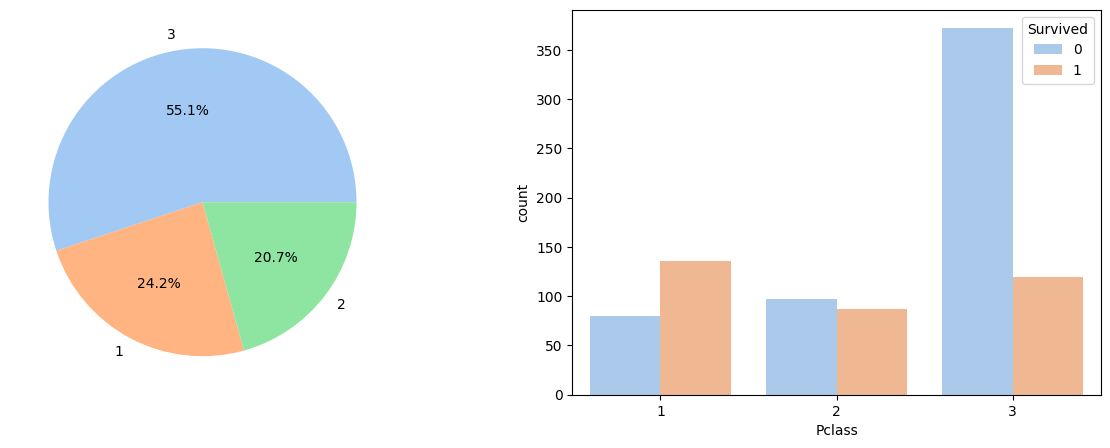

In [24]:
#将饼图和计数图并排放置
fig,axes=plt.subplots(1,2,figsize=(15,5))
axes[0].pie(Pclass_counts,labels=Pclass_counts.index,autopct='%.1f%%')
sns.countplot(data=clean_train,x="Pclass",hue="Survived",ax=axes[1])
plt.show()

观察上图可以发现，三等舱的乘客最多，一等舱次之，二等舱的乘客最少；一等舱的存活概率最高，二等舱的存活概率次之，三等舱的存活概率最小
说明船舱等级越高，幸存的概率越高，这是符合常理与预期的

#### （2）Sex

对于Sex，我们可以仿照Pclass的绘制方法

In [25]:
Sex_counts=clean_train["Sex"].value_counts()

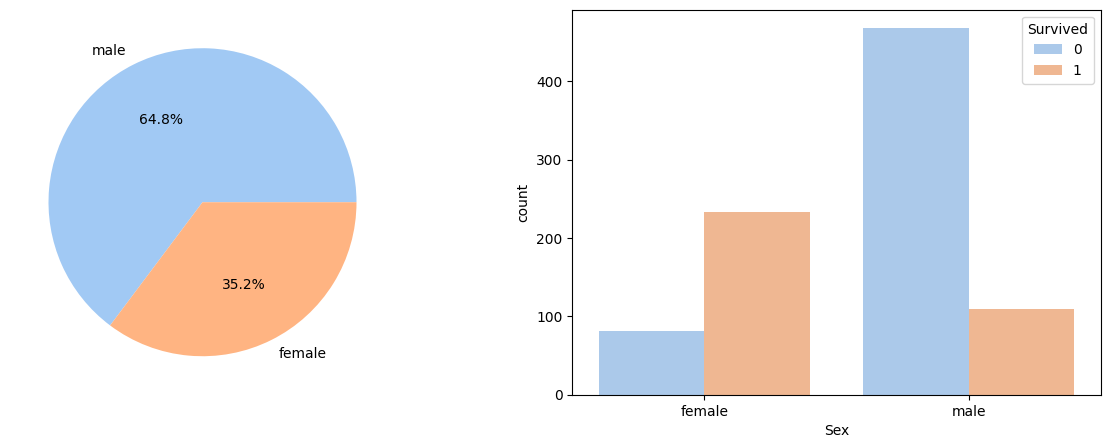

In [26]:
#将饼图和计数图并排放置
fig,axes=plt.subplots(1,2,figsize=(15,5))
axes[0].pie(Sex_counts,labels=Sex_counts.index,autopct='%.1f%%')
sns.countplot(data=clean_train,x="Sex",hue="Survived",ax=axes[1])
plt.show()

观察上图可以发现，男性与女性的比例大约为13:7；女性存活的概率远远高于男性存活的概率，这与“妇女和孩子先逃难”是一致的

#### （3）Embarked

对于Embarked同样可以采取上面的方法

In [27]:
Embarked_counts=clean_train["Embarked"].value_counts()

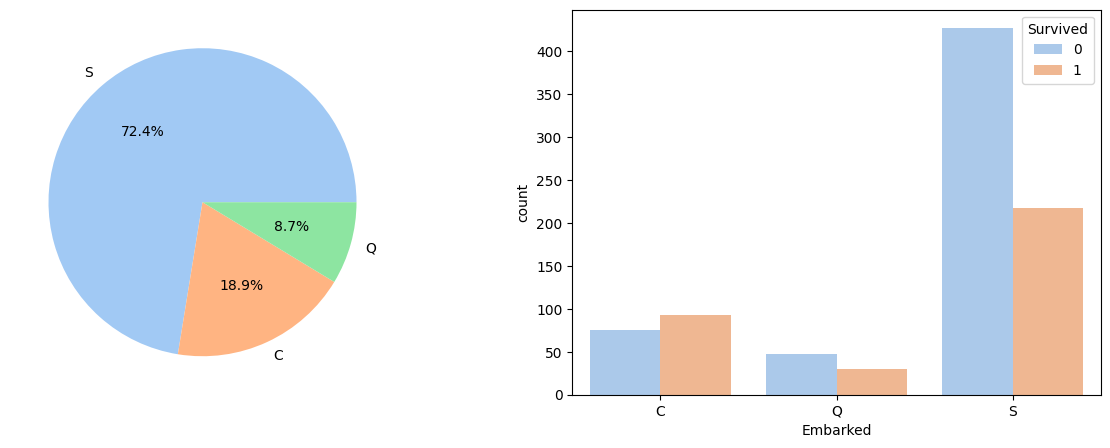

In [28]:
#将饼图和计数图并排放置
fig,axes=plt.subplots(1,2,figsize=(15,5))
axes[0].pie(Embarked_counts,labels=Embarked_counts.index,autopct='%.1f%%')
sns.countplot(data=clean_train,x="Embarked",hue="Survived",ax=axes[1])
plt.show()

观察上图可以发现，S港口登船的人数最多，约72%，C港口登船的人数次之，Q港口登船的人数最少；C港口登船的乘客存活率最高，Q港口登船的乘客次之，S港口登船的存活率最低

#### 2.数值变量对survived的影响：Age、Fare、FamilyNum

#### （1）Age

对于Age，我们可以先绘制频率分布直方图或者密度图了解年龄分布情况，再绘制频率分布直方图了解年龄对幸存率的影响

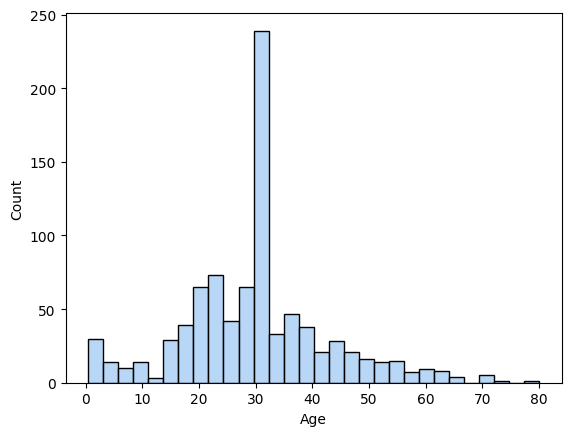

In [29]:
sns.histplot(clean_train["Age"])
plt.show()

观察上图可以发现，儿童和老人的比例较低，30岁左右的青壮年人数最多

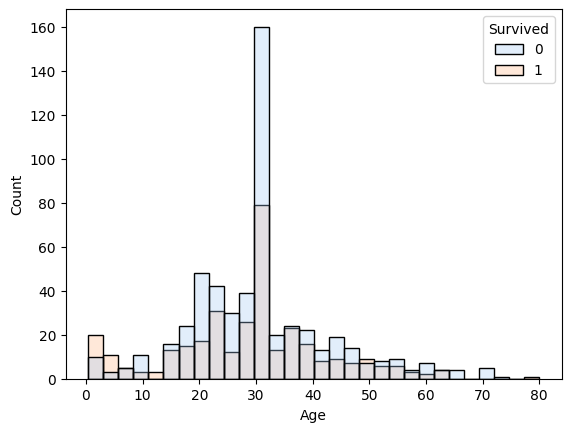

In [30]:
sns.histplot(clean_train,x="Age",hue="Survived",alpha=0.3)
plt.show()

观察可以发现，儿童和老人的幸存率较高，青壮年的幸存率较低，符合"老人孩子先走"的逃生原则

#### （2）Fare

与Age类似，我们也可以绘制频率分布直方图

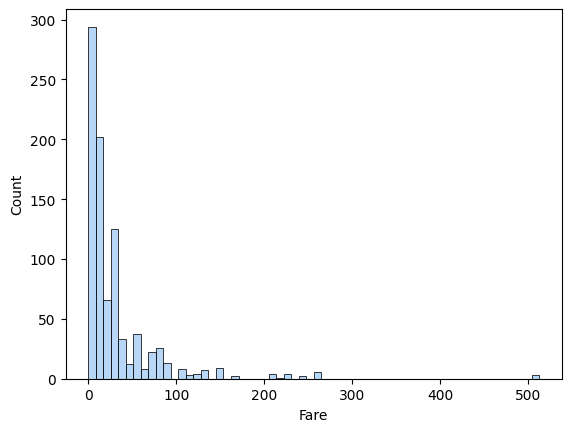

In [31]:
sns.histplot(clean_train["Fare"])
plt.show()

观察发现整体呈右偏态，大多数乘客的票价都比较低，少数乘客的票价很高

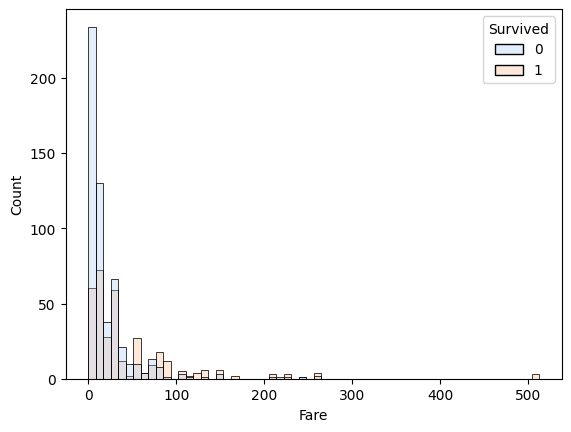

In [32]:
sns.histplot(clean_train,x="Fare",hue="Survived",alpha=0.3)
plt.show()

观察发现，票价较低的乘客的幸存率较低，票价较高的乘客幸存率较高，符合常理与预期

#### （3）FamliyNum

对于FamilyNum，我们同样可以采取上面的方法

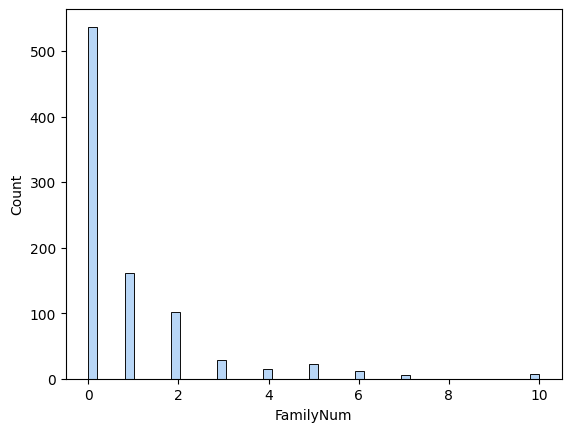

In [33]:
sns.histplot(clean_train["FamilyNum"])
plt.show()

观察可以发现大多数乘客没有亲人同行，少数人亲人多达10个

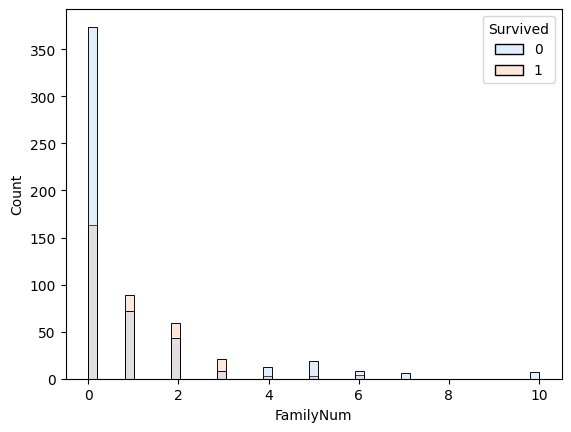

In [34]:
sns.histplot(clean_train,x="FamilyNum",hue="Survived",alpha=0.3)
plt.show()

观察发现没有亲人同行的乘客的幸存率较低；从1开始，随着亲人数量的增加，幸存率开始逐渐下降

### 五.逻辑回归模型建立

In [35]:
#导入需要使用的库函数
import statsmodels.api as sm

#### 1.去除无关变量

In [36]:
clean_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


在所有变量中，PassengerId、Name、Ticket、Cabin、Embarked是无关变量，需要先去除，再引入虚拟变量

In [37]:
train=clean_train.drop(["PassengerId","Name","Ticket","Cabin","Embarked"],axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilyNum
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0


#### 2.将分类变量转换为虚拟变量

In [38]:
train=pd.get_dummies(train,columns=["Pclass","Sex"],dtype=int,drop_first=True)
train.head()

,Survived,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,0,22.0,1,0,7.2500,1,0,1,1
1,1,38.0,1,0,71.2833,1,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0
3,1,35.0,1,0,53.1000,1,0,0,0
4,0,35.0,0,0,8.0500,0,0,1,1


#### 3.检查各变量之间的相关性

In [39]:
#调用corr方法
train.corr().abs()>0.8

,Survived,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
Survived,True,False,False,False,False,False,False,False,False
Age,False,True,False,False,False,False,False,False,False
SibSp,False,False,True,False,False,True,False,False,False
Parch,False,False,False,True,False,False,False,False,False
Fare,False,False,False,False,True,False,False,False,False
FamilyNum,False,False,True,False,False,True,False,False,False
Pclass_2,False,False,False,False,False,False,True,False,False
Pclass_3,False,False,False,False,False,False,False,True,False
Sex_male,False,False,False,False,False,False,False,False,True


观察发现SibSp与FamilyNum的相关性较高，这也是符合预期的，毕竟FamilyNum是根据SibSp计算得到的；同样我们可以检验一下FamilyNum和Parch的相关系数

In [40]:
train.corr().abs()

,Survived,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
Survived,1.000000,0.069809,0.035322,0.081629,0.257307,0.016639,0.093349,0.322308,0.543351
Age,0.069809,1.000000,0.232625,0.179191,0.091566,0.248512,0.006589,0.281004,0.084153
SibSp,0.035322,0.232625,1.000000,0.414838,0.159651,0.890712,0.055932,0.092548,0.114631
Parch,0.081629,0.179191,0.414838,1.000000,0.216225,0.783111,0.000734,0.015790,0.245489
Fare,0.257307,0.091566,0.159651,0.216225,1.000000,0.217138,0.118557,0.413333,0.182333
FamilyNum,0.016639,0.248512,0.890712,0.783111,0.217138,1.000000,0.038594,0.071142,0.200988
Pclass_2,0.093349,0.006589,0.055932,0.000734,0.118557,0.038594,1.000000,0.565210,0.064746
Pclass_3,0.322308,0.281004,0.092548,0.015790,0.413333,0.071142,0.565210,1.000000,0.137143
Sex_male,0.543351,0.084153,0.114631,0.245489,0.182333,0.200988,0.064746,0.137143,1.000000


观察发现FamilyNum与Parch的相关系数为0.783111，接近于0.8，因此我们可以考虑将Parch与SibSp去除

#### 4.分离因变量和自变量

In [41]:
y=train["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: category
Categories (2, int64): [0, 1]

In [42]:
X=train.drop(["SibSp","Parch","Survived"],axis=1)
X

,Age,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,22.000000,7.2500,1,0,1,1
1,38.000000,71.2833,1,0,0,0
2,26.000000,7.9250,0,0,1,0
3,35.000000,53.1000,1,0,0,0
4,35.000000,8.0500,0,0,1,1
...,...,...,...,...,...,...
886,27.000000,13.0000,0,1,0,1
887,19.000000,30.0000,0,0,0,0
888,29.699118,23.4500,3,0,1,0
889,26.000000,30.0000,0,0,0,1


#### 5.添加截距

In [43]:
#调用constant函数
X=sm.add_constant(X)
X

,const,Age,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,1.0,22.000000,7.2500,1,0,1,1
1,1.0,38.000000,71.2833,1,0,0,0
2,1.0,26.000000,7.9250,0,0,1,0
3,1.0,35.000000,53.1000,1,0,0,0
4,1.0,35.000000,8.0500,0,0,1,1
...,...,...,...,...,...,...,...
886,1.0,27.000000,13.0000,0,1,0,1
887,1.0,19.000000,30.0000,0,0,0,0
888,1.0,29.699118,23.4500,3,0,1,0
889,1.0,26.000000,30.0000,0,0,0,1


#### 6.建立模型

In [44]:
#调用Logit函数
model=sm.Logit(y,X).fit()

Optimization terminated successfully.
         Current function value: 0.443547
         Iterations 6


In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Thu, 14 Aug 2025   Pseudo R-squ.:                  0.3339
Time:                        14:55:22   Log-Likelihood:                -395.20
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.786e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8097      0.445      8.568      0.000       2.938       4.681
Age           -0.0388      0.008     -4.963      0.000      -0.054      -0.023
Fare           0.0032      0.002      1.311      0.190      -0.002       0.008
FamilyNum     -0.2430      0.068     -3.594      0.000      -0.376      -0.110
Pclass_2      -1.0003      0.293     -3.416      0.001      -1.574      -0.426
Pclass_3      -2.1324      0.289     -7.373      0.000      -2.699      -1.566
Sex_male      -2.7759      0.199    -13.980      0.000      -3.165      -2.387
==============================================================================
"""

观察发现Fare的P值大于显著水平0.05，说明Fare对于幸存率的影响并不大，可以去除再重新建立模型

In [46]:
X=X.drop(["Fare"],axis=1)
X

,const,Age,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,1.0,22.000000,1,0,1,1
1,1.0,38.000000,1,0,0,0
2,1.0,26.000000,0,0,1,0
3,1.0,35.000000,1,0,0,0
4,1.0,35.000000,0,0,1,1
...,...,...,...,...,...,...
886,1.0,27.000000,0,1,0,1
887,1.0,19.000000,0,0,0,0
888,1.0,29.699118,3,0,1,0
889,1.0,26.000000,0,0,0,1


In [47]:
model=sm.Logit(y,X).fit()

Optimization terminated successfully.
         Current function value: 0.444623
         Iterations 6


In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Thu, 14 Aug 2025   Pseudo R-squ.:                  0.3323
Time:                        14:55:22   Log-Likelihood:                -396.16
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.927e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0620      0.404     10.049      0.000       3.270       4.854
Age           -0.0395      0.008     -5.065      0.000      -0.055      -0.024
FamilyNum     -0.2186      0.065     -3.383      0.001      -0.345      -0.092
Pclass_2      -1.1798      0.261     -4.518      0.000      -1.692      -0.668
Pclass_3      -2.3458      0.242     -9.676      0.000      -2.821      -1.871
Sex_male      -2.7854      0.198    -14.069      0.000      -3.173      -2.397
==============================================================================
"""

模型建立完毕

接下来可以分析各个自变量对于Survived的影响，可以使用NumPy的exp函数

In [49]:
#const
print(np.exp(4.0620))

58.09037572707713


这说明常数增加1，幸存的概率就变成原来的58倍

In [50]:
#Age
print(np.exp(-0.0395))

0.9612699539905982


这说明年龄每增加1岁幸存的概率就变为原来的96%

In [51]:
#FamilyNum
print(np.exp(-0.2186))

0.803643111115195


这说明同行的亲人每多一位，幸存的概率就变为原来的80%

In [52]:
#Pclass_2
print(np.exp(-1.1798))

0.30734020049483596


这说明二等舱乘客的幸存概率为一等舱乘客的30%

In [53]:
#Pclass_3
print(np.exp(-2.3458))

0.09577055503172162


这说明三等舱乘客的幸存概率仅为一等舱乘客的9%

In [54]:
#Sex_male
print(np.exp(-2.7854))

0.061704402333015156


这说明男性乘客的幸存概率仅为女性乘客的6%

总结：

-儿童和女性的幸存概率更高


-船舱等级越高幸存率越高


-同行的亲人越少幸存率越高

#### 7.数据预测

首先读取数据

In [66]:
to_predict=pd.read_csv("./titanic_test.csv")
to_predict.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


然后查看有无缺失变量

In [67]:
to_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


发现有一部分年龄缺失，因此需要手动填充，依然可以采用平均值进行填充

In [68]:
to_predict["Age"]=to_predict["Age"].fillna(to_predict["Age"].mean())

In [69]:
to_predict["Pclass"]=to_predict["Pclass"].astype('category')
to_predict["Sex"]=to_predict["Sex"].astype('category')
to_predict["Embarked"]=to_predict["Embarked"].astype('category')
to_predict["PassengerId"]=to_predict["PassengerId"].astype(str)

合并出FamilyNum

In [70]:
to_predict["FamilyNum"]=to_predict["SibSp"]+to_predict["Parch"]

In [71]:
to_predict[to_predict["Age"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum


再将分类变量转换为虚拟变量

In [72]:
#调用Categorical函数
to_predict["Pclass"]=pd.Categorical(to_predict["Pclass"],categories=["1","2","3"])
to_predict["Sex"]=pd.Categorical(to_predict["Sex"],categories=["female","male"])

In [74]:
to_predict=pd.get_dummies(to_predict,columns=["Pclass","Sex"],dtype=int,drop_first=True)

In [75]:
to_predict

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,892,"Kelly, Mr. James",34.50000,0,0,330911,7.8292,NaN,Q,0,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.00000,1,0,363272,7.0000,NaN,S,1,0,0,0
2,894,"Myles, Mr. Thomas Francis",62.00000,0,0,240276,9.6875,NaN,Q,0,0,0,1
3,895,"Wirz, Mr. Albert",27.00000,0,0,315154,8.6625,NaN,S,0,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1,1,3101298,12.2875,NaN,S,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",30.27259,0,0,A.5. 3236,8.0500,NaN,S,0,0,0,1
414,1306,"Oliva y Ocana, Dona. Fermina",39.00000,0,0,PC 17758,108.9000,C105,C,0,0,0,0
415,1307,"Saether, Mr. Simon Sivertsen",38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,0,1
416,1308,"Ware, Mr. Frederick",30.27259,0,0,359309,8.0500,NaN,S,0,0,0,1


然后提取出所需的自变量

In [76]:
X_test=to_predict.drop(["PassengerId","Name","Ticket","Cabin","Embarked","SibSp","Parch","Fare"],axis=1)
X_test.head()

,Age,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,34.5,0,0,0,1
1,47.0,1,0,0,0
2,62.0,0,0,0,1
3,27.0,0,0,0,1
4,22.0,2,0,0,0


然后添加截距

In [78]:
X_test=sm.add_constant(X_test)
X_test

,const,Age,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,1.0,34.50000,0,0,0,1
1,1.0,47.00000,1,0,0,0
2,1.0,62.00000,0,0,0,1
3,1.0,27.00000,0,0,0,1
4,1.0,22.00000,2,0,0,0
...,...,...,...,...,...,...
413,1.0,30.27259,0,0,0,1
414,1.0,39.00000,0,0,0,0
415,1.0,38.50000,0,0,0,1
416,1.0,30.27259,0,0,0,1


最后将数据代入模型中计算得到乘客的幸存概率

In [80]:
result=model.predict(X_test)

In [81]:
result

0      0.478514
1      0.879434
2      0.236473
3      0.552361
4      0.940242
         ...   
413    0.520230
414    0.925647
415    0.439306
416    0.520230
417    0.411858
Length: 418, dtype: float64

## 结论

如果认为幸存概率大于0.5为存活的话，我们可以预测每名乘客的存活情况：

In [82]:
result>0.5

0      False
1       True
2      False
3       True
4       True
       ...  
413     True
414     True
415    False
416     True
417    False
Length: 418, dtype: bool